# Q Learning and SARSA

## Imports

In [1]:
import gym
import itertools

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from agents import QLearningAgent, SarsaAgent
from tqdm.notebook import tqdm

## Taxi

- 4 locations
- Pickup passenger at one location and drop him off at another
- 6 actions: move NORTH, SOUTH, EAST, WEST + PICK_UP + DROP_OFF
- Rewards: +20 for successful drop-off, -1 per movement, -10 for illegal pick-up or drop-off

### Grid Search

We look at all options hinted and choose the one with the highest average reward.

In [2]:
LEARNING_RATES = [0.1, 0.5, 0.9]
DISCOUNT_FACTORS = [0.9, 0.99]
EXPLORATION_RATES = [0.1, 0.2, 0.5]
NUM_EPOCHS = 5000

In [3]:
def grid_search(env, learning_rates, discount_factors, exploration_rates, num_epochs, AgentClass):
    best_reward = -np.inf
    best_params = None
    
    pbar = tqdm(list(itertools.product(learning_rates, discount_factors, exploration_rates)))
    for (lr, df, er) in pbar:
        agent = AgentClass(env, alpha=lr, gamma=df, epsilon=er, epochs=num_epochs, verbose=False)
        rewards, policy = agent.train()
        avg_reward = np.mean(rewards)
        
        if avg_reward > best_reward:
            best_reward = avg_reward
            best_params = (lr, df, er)
            
        pbar.set_description(f"Avg Reward {avg_reward} - Params alpha={lr}, gamma={df}, epsilon={er}")
            
    return best_reward, best_params

### QLearning

  0%|          | 0/18 [00:00<?, ?it/s]

Best Reward -2.09 - Params alpha=0.9, gamma=0.99, epsilon=0.5


100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1164.92it/s]


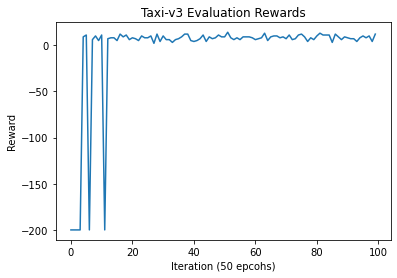

In [4]:
env_name = "Taxi-v3"

env = gym.make(env_name)

best_reward, (lr, df, er) = grid_search(env, LEARNING_RATES, DISCOUNT_FACTORS, EXPLORATION_RATES, NUM_EPOCHS, QLearningAgent)

print(f"Best Reward {best_reward} - Params alpha={lr}, gamma={df}, epsilon={er}")

agent = QLearningAgent(env, alpha=lr, gamma=df, epsilon=er, epochs=NUM_EPOCHS)
rewards, policy = agent.train()

sns.lineplot(x=range(len(rewards)), y=rewards)

plt.title(f"{env_name} Evaluation Rewards")
plt.xlabel("Iteration (50 epcohs)")
plt.ylabel("Reward")
plt.show()

### Sarsa

  0%|          | 0/18 [00:00<?, ?it/s]

Best Reward -64.54 - Params alpha=0.1, gamma=0.99, epsilon=0.1


100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 1749.40it/s]


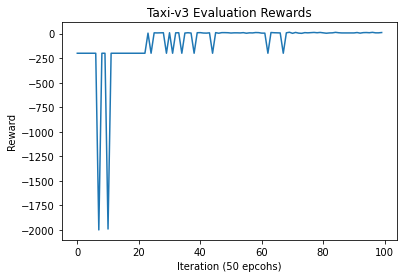

In [5]:
env_name = "Taxi-v3"

env = gym.make(env_name)

best_reward, (lr, df, er) = grid_search(env, LEARNING_RATES, DISCOUNT_FACTORS, EXPLORATION_RATES, NUM_EPOCHS, SarsaAgent)

print(f"Best Reward {best_reward} - Params alpha={lr}, gamma={df}, epsilon={er}")

agent = SarsaAgent(env, alpha=lr, gamma=df, epsilon=er, epochs=NUM_EPOCHS)
rewards, policy = agent.train()

sns.lineplot(x=range(len(rewards)), y=rewards)

plt.title(f"{env_name} Evaluation Rewards")
plt.xlabel("Iteration (50 epcohs)")
plt.ylabel("Reward")
plt.show()